In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [66]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import inspect

# Reflect Tables into SQLAlchemy ORM

In [67]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import distinct, func
from sqlalchemy import desc

In [68]:
database_path= "Resources/hawaii.sqlite"

In [69]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [70]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [71]:
# reflect an existing database into a new model
base= automap_base()
base.prepare(engine, reflect=True)

# reflect the tables


In [72]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [73]:
# Save references to each table
Measurements = base.classes.measurement
Station = base.classes.station

In [74]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [75]:
first_row = session.query(Measurements).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2d5f69161f0>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0}

# Exploratory Precipitation Analysis

In [76]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23',)

In [77]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


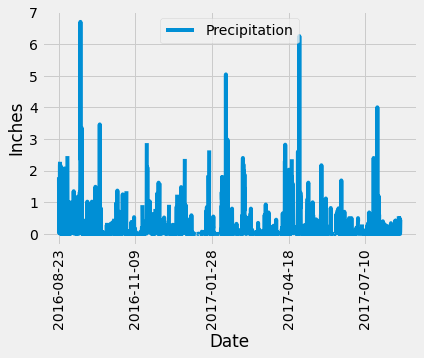

In [120]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
used_dates= session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2016-08-23').all()
dict_dates= session.query(Measurements.date).filter(Measurements.date >= '2016-08-23').all()
dict_prcp = session.query(Measurements.prcp).filter(Measurements.date >= '2016-08-23').all() 
# Save the query results as a Pandas DataFrame and set the index to the date column
dates_df = pd.DataFrame(used_dates, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
sorted_date_df = dates_df.sort_values("Date")

#indexdate_df = df.set_index('Date')


# Use Pandas Plotting with Matplotlib to plot the data
#indexdate_df.plot.bar()
sorted_date_df.plot(x='Date', y='Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90);


In [117]:
dict = dates_df.to_dict()
dict.keys()

dict_keys(['Date', 'Precipitation'])

In [79]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_table = sorted_date_df.groupby("Date").agg({"Precipitation":["mean","median","var","std","sem"]})
summary_table

Precipitation                                     
                    mean median       var       std       sem
Date                                                         
2016-08-23      0.451667  0.100  0.499097  0.706468  0.288414
2016-08-24      1.555000  1.800  0.706510  0.840541  0.343150
2016-08-25      0.077143  0.080  0.005157  0.071813  0.027143
2016-08-26      0.016667  0.015  0.000267  0.016330  0.006667
2016-08-27      0.064000  0.020  0.006680  0.081731  0.036551
...                  ...    ...       ...       ...       ...
2017-08-19      0.030000  0.000  0.002700  0.051962  0.030000
2017-08-20      0.005000  0.005  0.000050  0.007071  0.005000
2017-08-21      0.193333  0.020  0.100933  0.317700  0.183424
2017-08-22      0.166667  0.000  0.083333  0.288675  0.166667
2017-08-23      0.132500  0.040  0.046225  0.215000  0.107500

[366 rows x 5 columns]

In [105]:
sorted_date_df.agg({"Precipitation":["mean","median","var","std","sem"]})

,Precipitation
mean,0.177279
median,0.020000
var,0.212696
std,0.461190
sem,0.010259


# Exploratory Station Analysis

In [80]:
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [81]:
first_row = session.query(Measurements).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2d5f69161f0>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0}

In [82]:
uniq= session.query(func.count(Station.station)).all()
uniq


[(9,)]

In [83]:
# Design a query to calculate the total number stations in the dataset
uniq_station= session.query(Measurements).group_by(Measurements.station).count()
uniq_station

9

In [154]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_freq = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(desc(func.count(Measurements.station))).all()
station_freq

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [155]:
active = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(desc(func.count(Measurements.station))).limit(1)[0][0]
active

'USC00519281'

In [156]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurements.station, 
       func.min(Measurements.tobs), 
       func.max(Measurements.tobs), 
       func.avg(Measurements.tobs)]
active_temp = session.query(*sel).\
    filter(Measurements.station==active).all()
active_temp

date_list = []
for result in active_temp:
    row = {}
    row['Station ID'] = result[0]
    row['Lowest Temp'] = result[1]
    row['Highest Temp'] = result[2]
    row['Average Temp'] = result[3]
    date_list.append(row)
active_temp
date_list

[{'Station ID': 'USC00519281',
  'Lowest Temp': 54.0,
  'Highest Temp': 85.0,
  'Average Temp': 71.66378066378067}]

In [159]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
past_temp= session.query(Measurements.tobs).\
                    filter(Measurements.station== active).\
                    filter(Measurements.date>= year_ago).\
                    order_by(Measurements.tobs).all()

past_temp_df= pd.DataFrame( past_temp)
past_temp_df1= past_temp_df.rename(columns={0:'tobs'})
past_temp_df.head()

,0
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


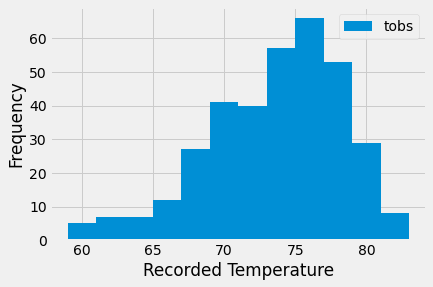

In [160]:
plt.hist(past_temp_df1['tobs'], bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

# Close session

In [161]:
# Close Session
session.close()